# Exploratory Data Analysis (EDA)

## 1 - Setup

In [3]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2 - Load Data

In [4]:
#Read the dataset.
df = pd.read_csv("../data/cleaned_data/cleaned_amazon_sales_dataset.csv")

In [5]:
df.head()

,order_date,product_id,product_category,price,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue,discount_fraction,log_total_revenue
0,2022-04-13,2637,Books,128.75,4,North America,UPI,3.5,443,115.88,463.52,0.10,6.141005
1,2023-03-12,2300,Fashion,302.60,5,Asia,Credit Card,3.7,475,242.08,1210.40,0.20,7.099532
2,2022-09-28,3670,Sports,495.80,2,Europe,UPI,4.4,183,396.64,793.28,0.20,6.677436
3,2022-04-17,2522,Books,371.95,4,Middle East,UPI,5.0,212,316.16,1264.64,0.15,7.143333
4,2022-03-13,1717,Beauty,201.68,4,Middle East,UPI,4.6,308,201.68,806.72,0.00,6.694215


## 3. Analysis

In [6]:
#Check a random product_id and its order_date, review_count, quantity_sold, and rating.
product_id_value = 2522  

filtered_sorted = (
    df[df["product_id"] == product_id_value]
    .sort_values(by="order_date", ascending=True)
)

print(filtered_sorted[["order_date", "review_count","quantity_sold","rating"]])

       order_date  review_count  quantity_sold  rating
3      2022-04-17           212              4     5.0
49815  2022-04-30           415              1     1.6
33009  2022-07-03           145              1     4.0
26110  2022-07-14           417              5     3.4
22361  2022-12-06           240              3     2.1
42159  2022-12-17           494              3     4.8
14468  2023-04-03           271              3     4.3
45471  2023-07-01           288              4     3.4
29041  2023-09-16            62              1     2.6


- When examining the sales of a specific product chronologically (from past to present), the review_count variable appears inconsistent. If it represented the cumulative number of reviews at that time, it would be expected to increase over time. However, it does not show such a pattern.

- It also does not make sense for review_count to represent the number of reviews made on that specific day, because there is a significant discrepancy between quantity_sold and review_count.

- Additionally, the rating variable appears completely inconsistent, seemingly consisting of randomly assigned values between 0 and 5 rather than reflecting a meaningful relationship with sales or reviews.

In [7]:
df.describe()

,product_id,price,quantity_sold,rating,review_count,discounted_price,total_revenue,discount_fraction,log_total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2986.848740,252.507260,2.999400,2.996316,249.329280,218.886566,657.331475,0.133407,6.072502
std,1156.374535,143.025544,1.415401,1.154295,144.251981,127.317681,526.223968,0.098507,1.052725
min,1000.000000,5.010000,1.000000,1.000000,0.000000,3.530000,3.840000,0.000000,1.576915
25%,1983.000000,127.840000,2.000000,2.000000,125.000000,109.680000,240.320000,0.050000,5.486124
50%,2983.000000,252.970000,3.000000,3.000000,250.000000,215.805000,505.410000,0.100000,6.227347
75%,3989.000000,376.335000,4.000000,4.000000,374.000000,322.702500,968.970000,0.200000,6.877265
max,4999.000000,499.990000,5.000000,5.000000,499.000000,499.910000,2499.550000,0.300000,7.824266


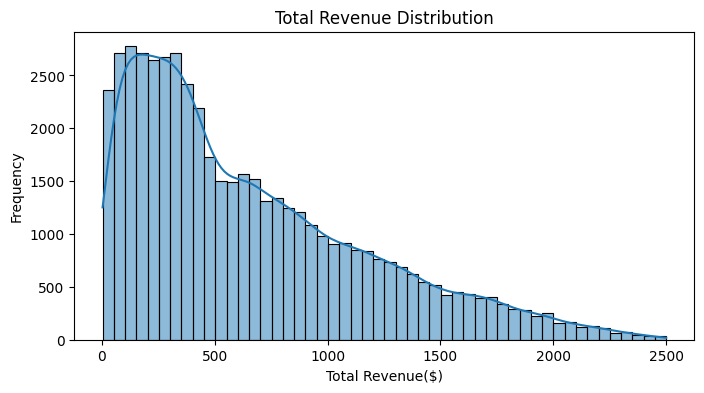

In [8]:
#Visualize the distribution of total revenue.
plt.figure(figsize=(8,4))
sns.histplot(df['total_revenue'], bins=50, kde=True)
plt.title("Total Revenue Distribution")
plt.xlabel("Total Revenue($)")
plt.ylabel("Frequency")
plt.show()


In [10]:
# The most common payment methods used by customers.
payment_counts = df['payment_method'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count']

payment_counts

,Payment Method,Count
0,Wallet,10106
1,UPI,10078
2,Debit Card,9981
3,Cash on Delivery,9927
4,Credit Card,9908



- The most common payment method is "Wallet" with 10106 tansactions.
- The least common payment method is "Credit Card" with 9908 transactions.

In [11]:
df.columns

Index(['order_date', 'product_id', 'product_category', 'price',
       'quantity_sold', 'customer_region', 'payment_method', 'rating',
       'review_count', 'discounted_price', 'total_revenue',
       'discount_fraction', 'log_total_revenue'],
      dtype='object')

In [12]:
# The distribution of orders across different customer regions.
region_counts = df['customer_region'].value_counts().reset_index()
region_counts.columns = ['Customer Region', 'Order Count']

region_counts

,Customer Region,Order Count
0,Asia,12526
1,North America,12517
2,Middle East,12505
3,Europe,12452



- The most common region of customers is Asia.
- The least common region of customers is Europe.

In [ ]:
region_revenue = (
    df.groupby("customer_region")["total_revenue"]
      .sum()
      .sort_values(ascending=False)
)

print(region_revenue)



customer_region
Middle East      8301844.50
North America    8277217.84
Asia             8175199.83
Europe           8112311.57
Name: total_revenue, dtype: float64


- Region with the highest total revenue is Middle East

#### Average Order Value

In [29]:
avg_order_value = df["total_revenue"].sum() / len(df)
print("Average order value:", avg_order_value)

Average order value: 657.3314748


In [19]:
df.groupby("customer_region")["total_revenue"].mean()

customer_region
Asia             652.658457
Europe           651.486634
Middle East      663.882007
North America    661.278089
Name: total_revenue, dtype: float64

### Analysis by Product Category

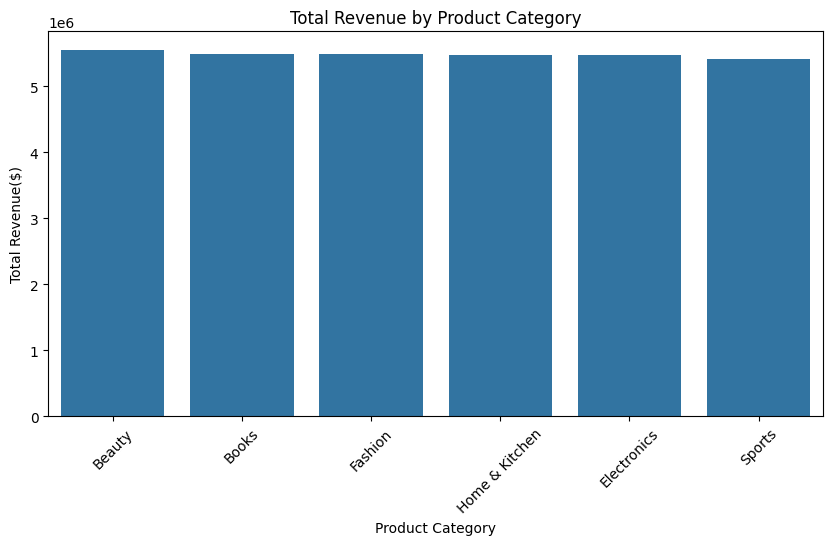

In [ ]:
#Total revenue by product category.
category_revenue = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.xticks(rotation=45)
plt.title("Total Revenue by Product Category")
plt.ylabel("Total Revenue($)")
plt.xlabel("Product Category")
plt.show()

In [22]:
# Group by product_category and sum total_revenue
category_revenue_table = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False)

# Format the total_revenue values with commas and decimal places
category_revenue_table = category_revenue_table.reset_index()
category_revenue_table.columns = ['Product Category', 'Total Revenue']
category_revenue_table['Total Revenue'] = category_revenue_table['Total Revenue'].apply(lambda x: f"{x:,.2f}$")
category_revenue_table

,Product Category,Total Revenue
0,Beauty,"5,550,624.97$"
1,Books,"5,484,863.03$"
2,Fashion,"5,480,123.34$"
3,Home & Kitchen,"5,473,132.55$"
4,Electronics,"5,470,594.03$"
5,Sports,"5,407,235.82$"



- The most profitable product category is "Beauty" with a total revenue of 5,550,624.97$, 
- The least profitable category is "Sports" with 5,407,235.82$.

In [ ]:
# Group by product_category and sum quantity_sold
category_quantity = (
    df.groupby("product_category")["quantity_sold"]
      .sum()
      .sort_values(ascending=False)
)


print(category_quantity.head(10))

print("\nTop Category:", category_quantity.idxmax())
print("Quantity Sold:", category_quantity.max())

product_category
Beauty            25422
Fashion           25089
Books             25065
Electronics       24898
Sports            24753
Home & Kitchen    24743
Name: quantity_sold, dtype: int64

Top Category: Beauty
Quantity Sold: 25422


In [26]:
# Group by customer_region and product_category, then sum quantity_sold
region_category_quantity = (
    df.groupby(["customer_region", "product_category"])["quantity_sold"]
      .sum()
      .reset_index()
)

# For each region, find the category with the highest quantity_sold
top_category_by_region = (
    region_category_quantity
    .sort_values(["customer_region", "quantity_sold"], ascending=[True, False])
    .groupby("customer_region")
    .first()
    .reset_index()
)

print(top_category_by_region)

  customer_region product_category  quantity_sold
0            Asia            Books           6378
1          Europe          Fashion           6396
2     Middle East            Books           6517
3   North America           Beauty           6500


#### Average Price & Discount per Category

In [27]:
df.groupby("product_category")[["price", "discount_fraction"]].mean()

,price,discount_fraction
product_category,,
Beauty,252.405289,0.133715
Books,252.682468,0.133373
Electronics,251.893404,0.132584
Fashion,252.347879,0.133586
Home & Kitchen,253.812631,0.133113
Sports,251.910161,0.134065


#### Correlation

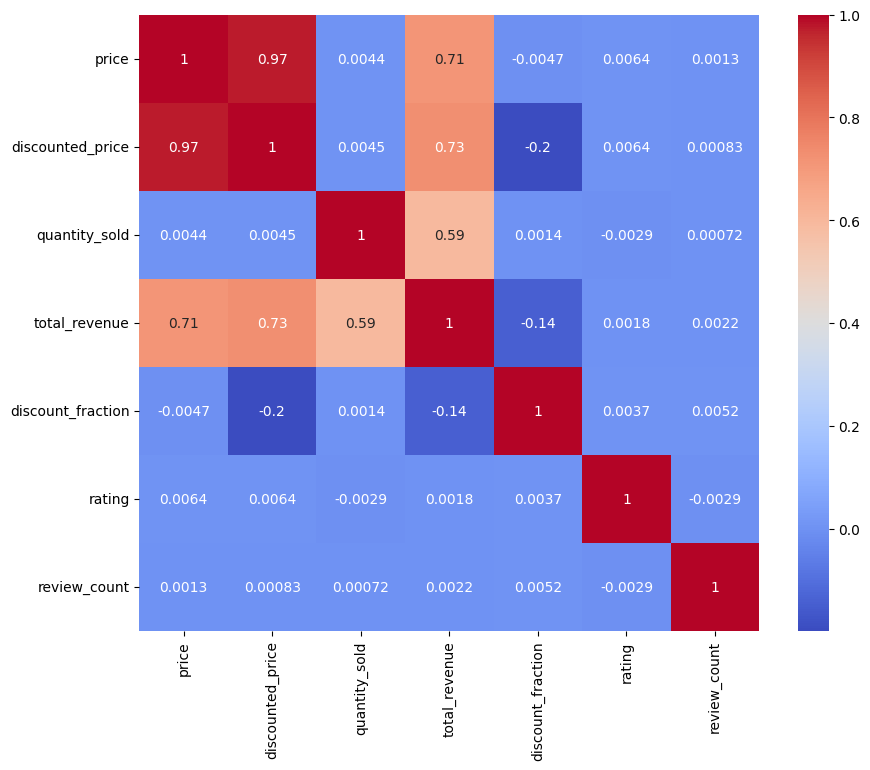

In [30]:
numeric_cols = [
    "price",
    "discounted_price",
    "quantity_sold",
    "total_revenue",
    "discount_fraction",
    "rating",
    "review_count"
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

📌 Price vs. Discounted Price

Correlation: 0.975 → Very Strong Positive Relationship

The original price and discounted price move almost identically.

This means most products have very small discounts.

Some products may not have any discount at all.

Interpretation:
discounted_price provides little additional information beyond price, since they are nearly perfectly correlated.

📌 Rating and Review Count 

Correlation: Approximately 0 (−0.003 to 0.006)

rating shows almost no correlation with sales or revenue.

review_count is also nearly uncorrelated with other variables.

Interpretation:
There is no meaningful linear relationship between these variables and sales performance (quantity_sold or total_revenue).

This aligns with earlier observations, suggesting that rating and review_count may be synthetic, inconsistent, or not informative features for prediction.

In [24]:
df.groupby("discount_fraction")["total_revenue"].mean().sort_values(ascending=False)

discount_fraction
0.00    749.033022
0.05    727.819529
0.10    690.568783
0.15    640.445717
0.20    614.636293
0.30    521.556386
Name: total_revenue, dtype: float64

📌 Discount Fraction vs. Total Revenue

Correlation: −0.144 → Weak Negative Relationship

Higher discount levels are slightly associated with lower total revenue.

However, the relationship is weak.

In [25]:
df.groupby("discount_fraction")["quantity_sold"].mean()

discount_fraction
0.00    2.986490
0.05    2.995644
0.10    2.999759
0.15    3.003369
0.20    3.028763
0.30    2.982241
Name: quantity_sold, dtype: float64